# L_20: SVM with Kernels (Non-linear)

SVM can handle non-linear data using kernel tricks like RBF (Radial Basis Function).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
# Generate non-linear data
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

In [ ]:
# Visualize data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.title("Non-linearly Separable Data")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Split and train SVM with RBF kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

In [ ]:
# Evaluate
y_pred = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(svm_rbf, X_test, y_test)
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.grid(False)
plt.show()

![iris_petal_sepal.png](attachment:iris_petal_sepal.png)

![iris_petal_sepal.png](attachment:iris_petal_sepal.png)

Problem Statement: Build a machine learning model that can predict type of iris flower.

Q1. Load data from iris dataset and find its modules.
Q2. Creat a data frame and add target variable.
Q3. Decode names of flower in target variable and create separate dataframe for each flower.
Q4. Plot graph Sepal length vs Sepal Width.
Q5. Train model Using Support Vector Machine (SVM) and find accuracy.
Q6. Predict the flower if sepal length = 4.8,sepal width = 3.0,petal length = 1.5,petal width = 0.3
Q7. Tune model by important parameters.
Q8. Tune your model by using Hyper parameter tunning.

Q1. Load data from iris dataset and find its modules.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

In [ ]:
iris.target

Q2. Creat a data frame and add target variable.



In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

In [ ]:
df.shape

In [ ]:
iris.target_names

In [ ]:
df['target'] = iris.target
df.head()

In [ ]:
target_unique_values = df['target'].unique()
print(target_unique_values)

In [ ]:
df[df.target==1].head()

In [ ]:
df[df.target==2].head()

Q3. Decode names of flower in target variable and create separate dataframe for each flower.

In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.tail()

In [ ]:
df

In [ ]:
flower_unique_values = df['flower_name'].unique()
print(flower_unique_values)

In [ ]:
for target, flower_name in zip(target_unique_values,flower_unique_values):
    print(f"Target: {target}, Flower Name: {flower_name}")

In [ ]:
df0 = df[df['target']==0] 

In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

Q4. Plot graph Sepal length vs Sepal Width.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="red",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="red",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

Q5. Train model Using Support Vector Machine (SVM) and find accuracy.



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
accuracy = model.score(X_test, y_test)
accuracy

Q6. Predict the flower if sepal length = 4.8,sepal width = 3.0,petal length = 1.5,petal width = 0.3

prediction = model.predict([[4.8,3.0,1.5,0.3]])
prediction
# if  0, Flower Name: setosa
# if 1, Flower Name: versicolor
# if 2, Flower Name: virginica

In [ ]:
if prediction == 0 :
    print(' Predicted Flower is setosa')
elif prediction == 1 :
     print(' Predicted Flower is versicolor')
else : print('Predicted Flower is virginica')

Q7. Tune model by important parameters.

One can tune SVM by changing the parameters C,γ and the kernel function.

In [ ]:
1. Regularization parameter (C)

lesser value of C gives Smooth decision boundary

svm2.png

In [ ]:
# change the value of C from 1 to 100 and see accuracy changes
model_C = SVC(C=100)
model_C.fit(X_train, y_train)
accuracy = model_C.score(X_train, y_train)
accuracy

2. Gamma

 In Low gamma: far points are also considered 
    In High gamma: near points are considered

In [ ]:
![svm3.png](attachment:svm3.png)

In [ ]:
# change the value of gamma from 1 to 100 and see accuracy changes
model_g = SVC(gamma=1)
model_g.fit(X_train, y_train)
accuracy = model_g.score(X_test, y_test)
accuracy

3. Kernel

We can use different Kernels to get best boundaries It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or a callable. The default value is ‘rbf’.

In [ ]:
![svm4.png](attachment:svm4.png)

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
accuracy = model_linear_kernal.score(X_test, y_test)
accuracy

Q8. Tune your model by using Hyper parameter tunning.

In [ ]:
C = [1,20,40,50,60,80,100]
gamma = [1,20,40,50,60,80,100]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
acc = []

for kval in kernels:
    for cval in C:
         for gval in gamma:
                model_tune = SVC(kernel= kval,C = cval,gamma=gval)
                model_tune.fit(X_train, y_train)
                accuracy =model_tune.score(X_test, y_test)
                acc.append(accuracy)
                print(accuracy,kval,cval,gval)
            
print('maximum value of accuracy is ',max(acc))
print('minimum value of accuracy is ',min(acc))

## 💡 Summary
- RBF kernel maps input to higher dimensions.
- Handles non-linear classification effectively.
- Use `gamma` to control curvature of decision boundary.

In [ ]:
END

 L_20: SVM with Kernels (Non-linear)

SVM can handle non-linear data using kernel tricks like RBF (Radial Basis Function).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [6]:
# Generate non-linear data
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

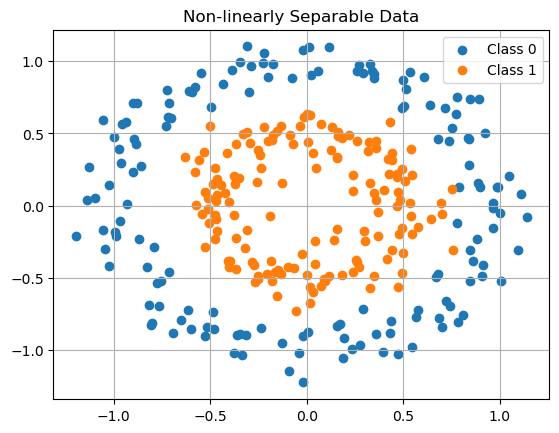

In [7]:
# Visualize data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.title("Non-linearly Separable Data")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Split and train SVM with RBF kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        34

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



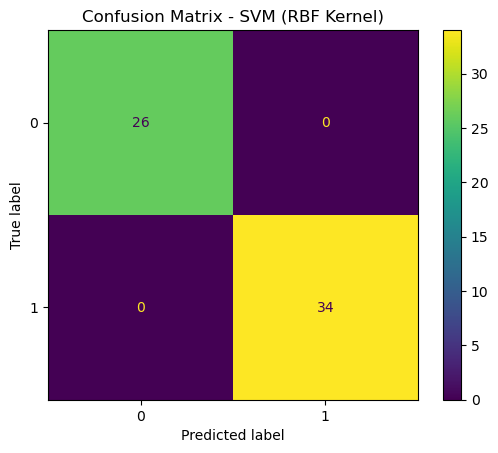

In [9]:
# Evaluate
y_pred = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(svm_rbf, X_test, y_test)
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.grid(False)
plt.show()

In [ ]:
![iris_petal_sepal.png](attachment:iris_petal_sepal.png)

In [ ]:
iris_petal_sepal.png


Problem Statement: Build a machine learning model that can predict type of iris flower.

Q1. Load data from iris dataset and find its modules.
Q2. Creat a data frame and add target variable.
Q3. Decode names of flower in target variable and create separate dataframe for each flower.
Q4. Plot graph Sepal length vs Sepal Width.
Q5. Train model Using Support Vector Machine (SVM) and find accuracy.
Q6. Predict the flower if sepal length = 4.8,sepal width = 3.0,petal length = 1.5,petal width = 0.3
Q7. Tune model by important parameters.
Q8. Tune your model by using Hyper parameter tunning.

Q1. Load data from iris dataset and find its modules.

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [11]:
iris = load_iris()

In [12]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Q2. Creat a data frame and add target variable.

In [14]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df.shape

(150, 4)

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
target_unique_values = df['target'].unique()
print(target_unique_values)

[0 1 2]


In [19]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [20]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


Q3. Decode names of flower in target variable and create separate dataframe for each flower.



In [21]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [22]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [23]:
flower_unique_values = df['flower_name'].unique()
print(flower_unique_values)

['setosa' 'versicolor' 'virginica']


In [24]:
for target, flower_name in zip(target_unique_values,flower_unique_values):
    print(f"Target: {target}, Flower Name: {flower_name}")

Target: 0, Flower Name: setosa
Target: 1, Flower Name: versicolor
Target: 2, Flower Name: virginica


In [25]:
df0 = df[df['target']==0] 

In [26]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

Q4. Plot graph Sepal length vs Sepal Width.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="red",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

In [29]:
<matplotlib.collections.PathCollection at 0x13d9cbaeec0>

Petal length vs Pepal Width (Setosa vs Versicolor)



SyntaxError: invalid syntax (3620894175.py, line 1)

In [30]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="red",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

Q5. Train model Using Support Vector Machine (SVM) and find accuracy.



In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
len(X_train)

120

In [35]:
len(X_test)

30

In [36]:
from sklearn.svm import SVC
model = SVC()

In [37]:
model.fit(X_train, y_train)

SVC()

In [38]:
accuracy = model.score(X_test, y_test)
accuracy

0.9666666666666667

Q6. Predict the flower if sepal length = 4.8,sepal width = 3.0,petal length = 1.5,petal width = 0.3



In [39]:
prediction = model.predict([[4.8,3.0,1.5,0.3]])
prediction
# if  0, Flower Name: setosa
# if 1, Flower Name: versicolor
# if 2, Flower Name: virginica

array([0])

In [40]:
if prediction == 0 :
    print(' Predicted Flower is setosa')
elif prediction == 1 :
     print(' Predicted Flower is versicolor')
else : print('Predicted Flower is virginica')

 Predicted Flower is setosa


Q7. Tune model by important parameters.

One can tune SVM by changing the parameters C,γ and the kernel function.

In [41]:
1. Regularization parameter (C)

lesser value of C gives Smooth decision boundary

svm2.png

SyntaxError: invalid syntax (3488962918.py, line 1)

In [42]:
# change the value of C from 1 to 100 and see accuracy changes
model_C = SVC(C=100)
model_C.fit(X_train, y_train)
accuracy = model_C.score(X_train, y_train)
accuracy

0.975

2. Gamma

 In Low gamma: far points are also considered 
 
    In High gamma: near points are considered

In [ ]:
![svm3.png](attachment:svm3.png)

In [43]:
# change the value of gamma from 1 to 100 and see accuracy changes
model_g = SVC(gamma=1)
model_g.fit(X_train, y_train)
accuracy = model_g.score(X_test, y_test)
accuracy

0.9666666666666667